In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad

### Formulas

In [5]:
def formating(x, text_val):
    print('{0}: {1:.6f} ± {2:.6f}'.format(text_val, x[0],x[1])) 

def formating_unc(value, unc, title):
    structure = '{0:.7f} ± {1:.7f}'
    print(title)
    for i,j in zip(value,unc):
        print(structure.format(i,j))
        
def func_pressure(force,force_unc,area,area_unc,pressure_atm):
    pressure = force/area + pressure_atm
    pressure_unc_pct = np.sqrt((force_unc/force)**2+(area_unc/area)**2)
    pressure_unc = pressure * pressure_unc_pct
    return pressure, pressure_unc

def func_area(diameter,diameter_unc):
    radius = diameter/2
    radius_unc_pct = np.sqrt((diameter_unc/diameter)**2+(diameter_unc/diameter)**2)
    area = np.pi*(radius**2)
    area_unc = area*radius_unc_pct
    return [area, area_unc]

def func_volume(Area, Area_unc, height, height_unc):
    volume = Area*height
    volume_unc_pct = np.sqrt((Area_unc/Area)**2+(height_unc/height)**2)
    volume_unc = volume * volume_unc_pct
    return volume, volume_unc  

def func_force(mass,mass_unc,g=9.80):
    force = mass*g
    force_unc = (mass_unc/mass)*force
    return [force, force_unc]


### Given values

In [6]:
# all lengths in units of m
tube_length = [0.535, 0.0001]
tube_diameter = [0.007, 0.0001]
cylinder_length = [0.16, 0.0001]
cylinder_diameter = [0.039, 0.0001]
piston_length = [.10, 0.0001]
piston_diameter = [0.0159, 0.0001]
pressure_atm = 101325   # units in (kg)/(m*s^2)
mass = [0.0499, 0.0001]
mass_piston_platform = [0.0159, 0.00006]

In [7]:
force = func_force(mass[0], mass[1])

In [8]:
area_of_cylinder = func_area(cylinder_diameter[0],cylinder_diameter[1])
formating(area_of_cylinder,'Area of Cylinder(m^2)')

Area of Cylinder(m^2): 0.001195 ± 0.000004


### Part 1

In [9]:
height1 = np.array([0.080, 0.040, 0.085, 0.098, 0.080])
height2 = np.array([0.080, 0.041, 0.071, 0.078, 0.080])
height3 = np.array([0.080, 0.035, 0.055, 0.065, 0.080])
height_unc = np.empty(5); height_unc.fill(0.0001)

In [10]:
heights = []
for i,j,k in zip(height1, height2, height3):
    avg = (i+j+k)/3
    heights.append(avg)
heights_unc = []
for i in height_unc:
    unc = np.sqrt(i**2+i**2+i**2)
    heights_unc.append(unc)
height_avg = np.array(heights)
height_avg_unc = np.array(heights_unc)
formating_unc(height_avg, height_avg_unc, 'Height Average(m)')

Height Average(m)
0.0800000 ± 0.0001732
0.0386667 ± 0.0001732
0.0703333 ± 0.0001732
0.0803333 ± 0.0001732
0.0800000 ± 0.0001732


In [11]:
volume_avg, volume_avg_unc = func_volume(area_of_cylinder[0], area_of_cylinder[1],
                                        height_avg, height_avg_unc)
formating_unc(volume_avg, volume_avg_unc, 'Volume Average(m^3)')

Volume Average(m^3)
0.0000956 ± 0.0000004
0.0000462 ± 0.0000003
0.0000840 ± 0.0000004
0.0000960 ± 0.0000004
0.0000956 ± 0.0000004


In [12]:
volume1, volume1_unc = func_volume(area_of_cylinder[0], area_of_cylinder[1],
                                  height1,height_unc)
volume2, volume2_unc = func_volume(area_of_cylinder[0], area_of_cylinder[1],
                                  height2,height_unc)
volume3, volume3_unc = func_volume(area_of_cylinder[0], area_of_cylinder[1],
                                  height3,height_unc)

In [13]:
pressure, pressure_unc = func_pressure(force[0],force[1],
                                      area_of_cylinder[0],area_of_cylinder[1],
                                      pressure_atm)
vec_pressure = np.array([0, pressure, pressure, 0, 0])
vec_pressure_unc = np.array([0, pressure_unc, pressure_unc, 0, 0])

### Plots

In [14]:
points = ['A', 'B', 'C', 'D', 'A']
df=pd.DataFrame(data={'Engine Cycle Points': points,
                      'Piston Height 1': height1,
                      'Piston Height 2': height2,
                      'Piston Height 3': height3,
                      'Volume 1':volume1,'Vol 1 Unc':volume1_unc,
                      'Volume 2':volume2,'Vol 2 Unc':volume2_unc,
                      'Volume 3':volume3,'Vol 3 Unc':volume3_unc,
                      'Pressure':vec_pressure,'Pressure Unc':vec_pressure_unc})
df

,Engine Cycle Points,Piston Height 1,Piston Height 2,Piston Height 3,Volume 1,Vol 1 Unc,Volume 2,Vol 2 Unc,Volume 3,Vol 3 Unc,Pressure,Pressure Unc
0,A,0.080,0.080,0.080,0.000096,3.665567e-07,0.000096,3.665567e-07,0.000096,3.665567e-07,0.000,0.000000
1,B,0.040,0.041,0.035,0.000048,2.104609e-07,0.000049,2.140414e-07,0.000042,1.930209e-07,101734.362,421.495812
2,C,0.085,0.071,0.055,0.000102,3.870977e-07,0.000085,3.299435e-07,0.000066,2.665208e-07,101734.362,421.495812
3,D,0.098,0.078,0.065,0.000117,4.410052e-07,0.000093,3.583772e-07,0.000078,3.058608e-07,0.000,0.000000
4,A,0.080,0.080,0.080,0.000096,3.665567e-07,0.000096,3.665567e-07,0.000096,3.665567e-07,0.000,0.000000


In [15]:
df2 = pd.DataFrame(data={'Engine Cycle Points':points,
                         'Piston Height Average':height_avg,
                         'Piston Height Avg Unc':height_avg_unc,
                         'Volume Average':volume_avg,
                         'Volume Avg Unc':volume_avg_unc,
                        'Pressure':vec_pressure,
                        'Pressure Unc':vec_pressure_unc})
df2

,Engine Cycle Points,Piston Height Average,Piston Height Avg Unc,Volume Average,Volume Avg Unc,Pressure,Pressure Unc
0,A,0.080000,0.000173,0.000096,4.036146e-07,0.000,0.000000
1,B,0.038667,0.000173,0.000046,2.662077e-07,101734.362,421.495812
2,C,0.070333,0.000173,0.000084,3.682874e-07,101734.362,421.495812
3,D,0.080333,0.000173,0.000096,4.048550e-07,0.000,0.000000
4,A,0.080000,0.000173,0.000096,4.036146e-07,0.000,0.000000


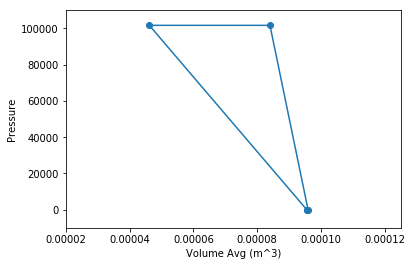

In [16]:
# Average Height
plt.scatter(df2['Volume Average'],df2['Pressure'])
plt.plot(df2['Volume Average'],df2['Pressure'])
plt.axis([0.000020,0.000125,-10000,110000])
plt.xlabel('Volume Avg (m^3)')
plt.ylabel('Pressure')
plt.show()

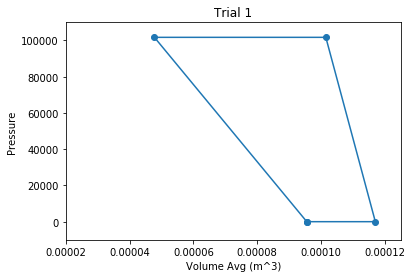

In [55]:
# Trial 1
plt.scatter(df['Volume 1'],df['Pressure'])
plt.plot(df['Volume 1'],df['Pressure'])
plt.axis([0.000020,0.000125,-10000,110000])
plt.xlabel('Volume Avg (m^3)')
plt.ylabel('Pressure')
plt.title('Trial 1')
plt.show()

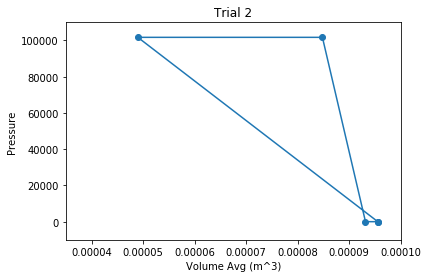

In [56]:
# Trial 2
plt.scatter(df['Volume 2'],df['Pressure'])
plt.plot(df['Volume 2'],df['Pressure'])
plt.axis([0.000035,0.000100,-10000,110000])
plt.xlabel('Volume Avg (m^3)')
plt.ylabel('Pressure')
plt.title('Trial 2')
plt.show()

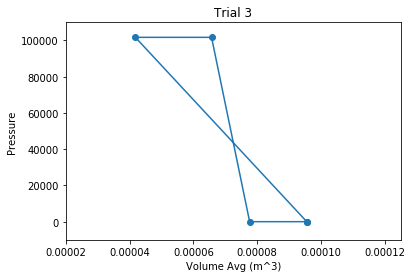

In [57]:
# Trial 3
plt.scatter(df['Volume 3'],df['Pressure'])
plt.plot(df['Volume 3'],df['Pressure'])
plt.axis([0.000020,0.000125,-10000,110000])
plt.xlabel('Volume Avg (m^3)')
plt.ylabel('Pressure')
plt.title('Trial 3')
plt.show()

### Part 2

In [23]:
# Proceed with trial 1 data
df1 = df.iloc[:,[0,1,4,5,10,11]]
df1

,Engine Cycle Points,Piston Height 1,Volume 1,Vol 1 Unc,Pressure,Pressure Unc
0,A,0.080,0.000096,3.665567e-07,0.000,0.000000
1,B,0.040,0.000048,2.104609e-07,101734.362,421.495812
2,C,0.085,0.000102,3.870977e-07,101734.362,421.495812
3,D,0.098,0.000117,4.410052e-07,0.000,0.000000
4,A,0.080,0.000096,3.665567e-07,0.000,0.000000


In [52]:
def integrand(x,p):
    return p

In [51]:
total_area = 0
for i in range(len(df1)-1):
    p = float(df1['Pressure'][i])
    lower_bound = float(df1['Volume 1'][i])
    upper_bound = float(df1['Volume 1'][i+1])
    ans = quad(integrand, lower_bound, upper_bound, args=(p))
    total_area += ans[0]
    print(ans[0])
print('Total Area enclosed: ', total_work)

-0.0
5.468891094288039
1.5799018716832116
-0.0
Total Area enclosed:  7.04879296597125
